## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [10]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, \
roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV

#from xgboost import XGBClassifier

import warnings




#### Import the CSV Data as Pandas DataFrame

In [11]:
df = pd.read_csv('/Users/bhargavdamarla/3_projects/2-DED_NonDED/data/data.csv')

#### Show Top 5 Records

In [12]:
df.head()

,age,gender,device_types_used,average_daily_usage_hours,years_of_digital_device_usage,ded_diagnosis,osdi_total_score,schirmer_test_left_eye,schirmer_test_right_eye,tbut_left_eye,tbut_right_eye,ocular_surface_staining_left_eye,ocular_surface_staining_right_eye,ded_severity,device_smartphone,device_computer,device_tablet,device_gaming_console
0,17,Female,"Smartphone, Computer",5,11,Yes,64.583333,1,5,1,4,3,2,Moderate,Yes,Yes,No,No
1,22,Female,"Tablet, Smartphone",8,1,Yes,83.333333,2,0,2,1,3,1,Severe,Yes,No,Yes,No
2,24,Female,"Smartphone, Computer",4,4,Yes,91.666667,1,2,2,5,1,1,Moderate,Yes,Yes,No,No
3,16,Female,"Gaming Console, Smartphone, Tablet",7,10,Yes,72.916667,0,5,4,1,1,3,Mild,Yes,No,Yes,Yes
4,21,Male,"Tablet, Smartphone",4,1,Yes,87.500000,2,3,3,1,3,3,Mild,Yes,No,Yes,No


In [13]:
df['ded_severity'].value_counts()

ded_severity
Normal      350
Severe      122
Moderate    117
Mild        111
Name: count, dtype: int64

### down sampling ded - normal col

In [14]:
df_mild_minority = df[df['ded_severity'] == 'Mild']
df_moderate_minority = df[df['ded_severity'] == 'Moderate']
df_severe_minority = df[df['ded_severity'] == 'Severe']
df_normal_majority = df[df['ded_severity'] == 'Normal']

In [15]:
from sklearn.utils import resample

In [16]:
df_normal_majority = df[df['ded_severity'] == 'Normal']
df_mild_minority = df[df['ded_severity'] == 'Mild']


In [17]:
df

,age,gender,device_types_used,average_daily_usage_hours,years_of_digital_device_usage,ded_diagnosis,osdi_total_score,schirmer_test_left_eye,schirmer_test_right_eye,tbut_left_eye,tbut_right_eye,ocular_surface_staining_left_eye,ocular_surface_staining_right_eye,ded_severity,device_smartphone,device_computer,device_tablet,device_gaming_console
0,17,Female,"Smartphone, Computer",5,11,Yes,64.583333,1,5,1,4,3,2,Moderate,Yes,Yes,No,No
1,22,Female,"Tablet, Smartphone",8,1,Yes,83.333333,2,0,2,1,3,1,Severe,Yes,No,Yes,No
2,24,Female,"Smartphone, Computer",4,4,Yes,91.666667,1,2,2,5,1,1,Moderate,Yes,Yes,No,No
3,16,Female,"Gaming Console, Smartphone, Tablet",7,10,Yes,72.916667,0,5,4,1,1,3,Mild,Yes,No,Yes,Yes
4,21,Male,"Tablet, Smartphone",4,1,Yes,87.500000,2,3,3,1,3,3,Mild,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,23,Female,"Smartphone, Computer",6,9,No,1.960000,12,10,11,12,0,0,Normal,Yes,Yes,No,No
696,20,Female,"Smartphone, Computer",8,12,No,1.020000,13,11,14,12,0,0,Normal,Yes,Yes,No,No
697,21,Female,"Smartphone, Computer",8,5,No,0.590000,11,12,12,14,0,0,Normal,Yes,Yes,No,No
698,22,Female,"Smartphone, Computer",8,11,No,6.130000,13,13,12,14,0,0,Normal,Yes,Yes,No,No


In [18]:
df_normal_downsampled = resample(df_normal_majority, replace=False, # sample with replacement
         n_samples= len(df_mild_minority),
         random_state=42 
        )

In [19]:
df_normal_downsampled.shape

(111, 18)

In [20]:
df_severe_minority.shape, df_moderate_minority.shape, df_mild_minority.shape

((122, 18), (117, 18), (111, 18))

In [21]:
df_downsampled = pd.concat([df_normal_downsampled, df_severe_minority ,df_moderate_minority, df_mild_minority ]).reset_index(drop=True)


In [22]:
df_downsampled['ded_severity'].value_counts()

ded_severity
Severe      122
Moderate    117
Normal      111
Mild        111
Name: count, dtype: int64

In [23]:
df = df_downsampled.copy()

In [24]:
df

,age,gender,device_types_used,average_daily_usage_hours,years_of_digital_device_usage,ded_diagnosis,osdi_total_score,schirmer_test_left_eye,schirmer_test_right_eye,tbut_left_eye,tbut_right_eye,ocular_surface_staining_left_eye,ocular_surface_staining_right_eye,ded_severity,device_smartphone,device_computer,device_tablet,device_gaming_console
0,23,Male,"Gaming Console, Smartphone, Tablet",8,10,No,8.000000,14,11,13,10,0,0,Normal,Yes,No,Yes,Yes
1,15,Male,"Gaming Console, Smartphone, Tablet",6,6,No,2.390000,12,10,13,15,0,0,Normal,Yes,No,Yes,Yes
2,30,Female,"Gaming Console, Smartphone, Tablet",3,6,No,9.770000,13,10,11,12,0,0,Normal,Yes,No,Yes,Yes
3,23,Male,"Gaming Console, Smartphone, Tablet",7,11,No,6.460000,14,11,10,13,0,0,Normal,Yes,No,Yes,Yes
4,27,Female,"Smartphone, Computer",8,12,No,6.900000,14,10,12,11,0,0,Normal,Yes,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,20,Male,"Smartphone, Computer",2,12,Yes,91.666667,1,1,3,3,3,1,Mild,Yes,Yes,No,No
457,15,Male,"Gaming Console, Smartphone, Tablet",9,4,Yes,89.583333,5,0,3,1,1,3,Mild,Yes,No,Yes,Yes
458,21,Male,"Smartphone, Computer",5,8,Yes,106.250000,1,5,0,0,3,1,Mild,Yes,Yes,No,No
459,22,Male,"Tablet, Smartphone",4,8,Yes,83.333333,2,2,2,3,1,2,Mild,Yes,No,Yes,No


In [25]:
df.drop(columns=['device_smartphone', 'device_computer',
       'device_tablet', 'device_gaming_console'], axis=1, inplace=True)

#### Preparing X and Y variables

In [26]:
X = df.drop(columns=['ded_severity', 'ded_diagnosis'],axis=1)

In [27]:
X.head()

,age,gender,device_types_used,average_daily_usage_hours,years_of_digital_device_usage,osdi_total_score,schirmer_test_left_eye,schirmer_test_right_eye,tbut_left_eye,tbut_right_eye,ocular_surface_staining_left_eye,ocular_surface_staining_right_eye
0,23,Male,"Gaming Console, Smartphone, Tablet",8,10,8.00,14,11,13,10,0,0
1,15,Male,"Gaming Console, Smartphone, Tablet",6,6,2.39,12,10,13,15,0,0
2,30,Female,"Gaming Console, Smartphone, Tablet",3,6,9.77,13,10,11,12,0,0
3,23,Male,"Gaming Console, Smartphone, Tablet",7,11,6.46,14,11,10,13,0,0
4,27,Female,"Smartphone, Computer",8,12,6.90,14,10,12,11,0,0


In [28]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [29]:
num_features

Index(['age', 'average_daily_usage_hours', 'years_of_digital_device_usage',
       'osdi_total_score', 'schirmer_test_left_eye', 'schirmer_test_right_eye',
       'tbut_left_eye', 'tbut_right_eye', 'ocular_surface_staining_left_eye',
       'ocular_surface_staining_right_eye'],
      dtype='object')

In [30]:
cat_features

Index(['gender', 'device_types_used'], dtype='object')

In [31]:
y = df['ded_severity']

In [32]:
y

0      Normal
1      Normal
2      Normal
3      Normal
4      Normal
        ...  
456      Mild
457      Mild
458      Mild
459      Mild
460      Mild
Name: ded_severity, Length: 461, dtype: object

In [33]:
y = y.map({'Normal' : 0, 'Mild':1, 'Moderate' : 2, 'Severe' : 3})

In [34]:
y

0      0
1      0
2      0
3      0
4      0
      ..
456    1
457    1
458    1
459    1
460    1
Name: ded_severity, Length: 461, dtype: int64

### train test split

In [35]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,  )
X_train.shape, X_test.shape

((368, 12), (93, 12))

In [36]:
y_test.value_counts()

ded_severity
0    27
1    27
3    24
2    15
Name: count, dtype: int64

In [37]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

<function matplotlib.pyplot.show(close=None, block=None)>

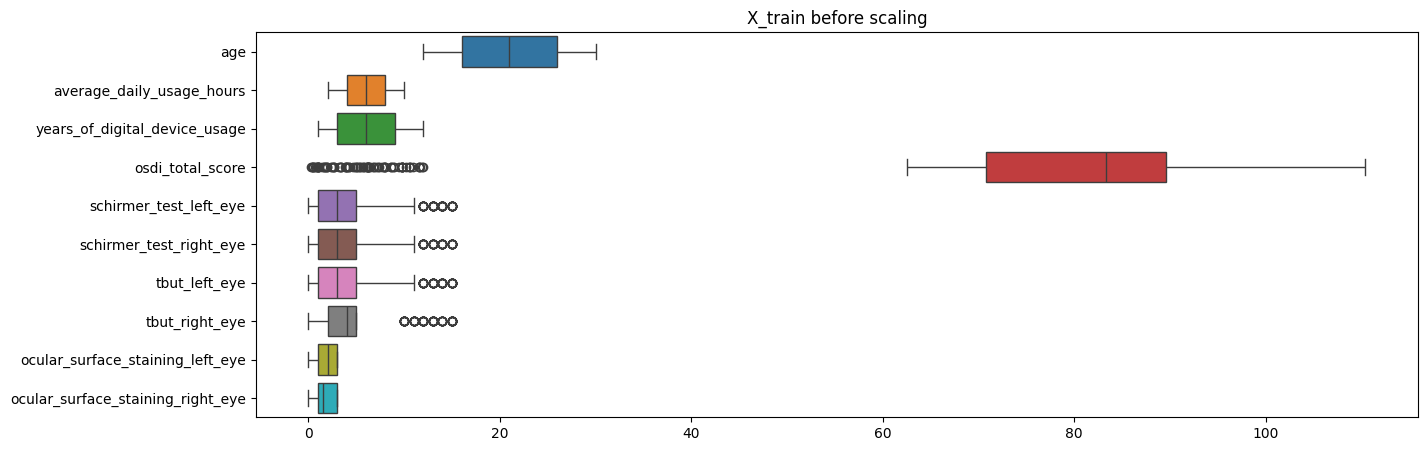

In [38]:
plt.figure(figsize=[15,5])
#plt.subplot(121)
sns.boxplot(data=X_train, orient='h' )
plt.title('X_train before scaling')
#plt.xticks(rotation=45)
plt.show

In [39]:
X_train=preprocessor.fit_transform(X_train)

In [40]:
X_train.shape, y_train.shape

((368, 15), (368,))

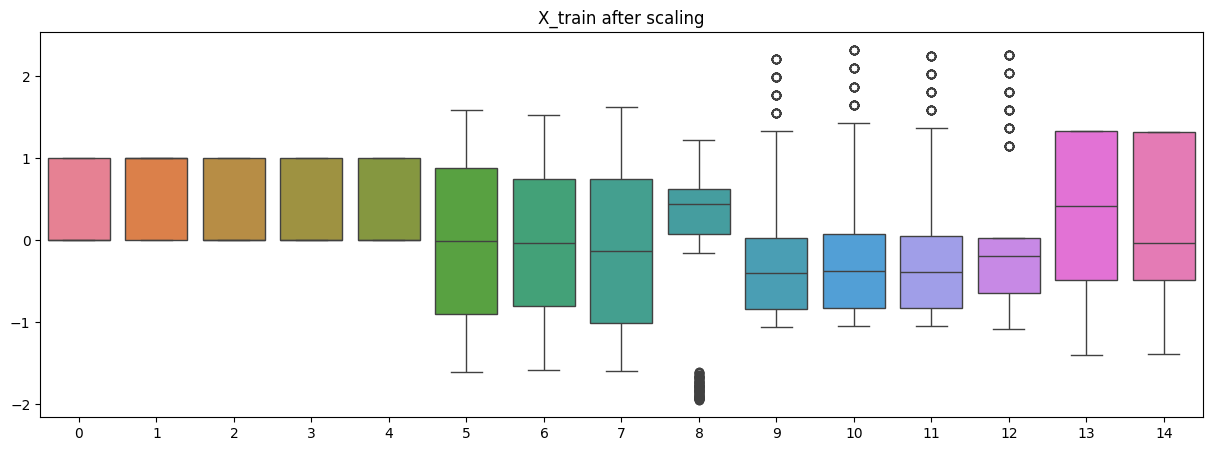

In [41]:
#plt.subplot(122)
plt.figure(figsize=[15,5])
sns.boxplot(data=X_train)
plt.title('X_train after scaling')

plt.show()

In [42]:
pd.DataFrame(X_train)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.0,0.0,1.0,0.0,0.167447,-0.806771,-0.126511,0.559388,0.031918,-1.047320,-0.602260,-0.640740,0.422307,-0.480785
1,1.0,0.0,0.0,0.0,1.0,-1.426190,1.141337,-1.004927,0.319961,0.031918,-0.597858,-0.383040,-0.417663,1.331132,-0.480785
2,0.0,1.0,0.0,1.0,0.0,-1.426190,1.530959,0.751905,-1.673604,1.119489,1.649453,1.151502,1.143876,-1.395342,-1.383484
3,0.0,1.0,1.0,0.0,0.0,0.167447,0.751716,0.166294,0.619244,-1.055654,-1.047320,-0.821480,-1.086894,-0.486518,1.324612
4,1.0,0.0,0.0,1.0,0.0,-0.717907,-0.417149,-0.712121,0.679101,0.031918,-0.597858,-0.821480,-1.086894,1.331132,-0.480785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,0.0,1.0,0.0,1.0,0.0,1.584014,-0.806771,-1.297732,-1.640851,1.989547,1.874184,1.370722,1.143876,-1.395342,-1.383484
364,1.0,0.0,0.0,1.0,0.0,1.229872,-0.806771,0.751905,0.499531,-0.620625,-1.047320,0.055401,-0.194586,0.422307,-0.480785
365,1.0,0.0,0.0,0.0,1.0,0.344518,-0.806771,0.751905,0.798815,-0.403111,-0.373127,-0.383040,-1.086894,-0.486518,0.421913
366,1.0,0.0,0.0,1.0,0.0,0.875731,0.751716,-1.004927,0.798815,-0.403111,-0.597858,0.055401,-0.640740,0.422307,-0.480785


In [43]:
X_test = preprocessor.transform(X_test)

In [44]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,1.0,-0.186694,-0.027528,1.630320,0.619244,-1.055654,-0.148396,-0.163819,-1.086894,-0.486518,1.324612
1,1.0,0.0,0.0,1.0,0.0,-0.186694,1.141337,-0.419316,-1.654929,1.554518,1.424722,1.151502,1.143876,-1.395342,-1.383484
2,0.0,1.0,1.0,0.0,0.0,1.584014,-1.586014,0.459099,-1.838521,1.989547,1.424722,2.028382,1.813107,-1.395342,-1.383484
3,1.0,0.0,0.0,1.0,0.0,-1.603261,-0.417149,0.166294,0.499531,-1.055654,-0.597858,-0.383040,-0.640740,1.331132,0.421913
4,0.0,1.0,0.0,0.0,1.0,-0.717907,-0.027528,0.751905,0.679101,-0.620625,-0.597858,-0.821480,-1.086894,0.422307,0.421913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.0,1.0,0.0,0.0,1.0,-0.009623,0.751716,0.459099,-1.721873,1.772032,1.199991,1.370722,2.259261,-1.395342,-1.383484
89,1.0,0.0,0.0,0.0,1.0,0.698660,-1.586014,1.630320,0.619244,-0.185596,-0.597858,-0.602260,-0.863817,1.331132,-0.480785
90,1.0,0.0,0.0,1.0,0.0,-1.603261,1.530959,-1.004927,-1.697164,1.554518,1.424722,1.589942,2.259261,-1.395342,-1.383484
91,0.0,1.0,1.0,0.0,0.0,-0.363765,-1.586014,-0.126511,0.559388,-0.620625,-0.822589,-0.602260,-1.086894,-0.486518,-0.480785


In [45]:
y_test.value_counts()

ded_severity
0    27
1    27
3    24
2    15
Name: count, dtype: int64

#### Create an Evaluate Function to give all metrics after model Training

In [46]:
def evaluate_model(true, predicted):
    
    y_pred_labels = np.argmax(predicted, axis=1)
    accuracy = accuracy_score(true, y_pred_labels ) # Calculate Accuracy
    f1 = f1_score(true, y_pred_labels, average='weighted') # Calculate F1-score
    precision = precision_score(true, y_pred_labels, average='weighted') # Calculate Precision
    recall = recall_score(true, y_pred_labels, average='weighted') # Calculate Recall
    rocauc_score = roc_auc_score(true, predicted, multi_class='ovr', average='weighted')
    return accuracy, f1, precision, recall, rocauc_score

In [47]:
print(set(y_test))

{0, 1, 2, 3}


In [48]:
#roc_auc_score(y_train, y_train_pred, multi_class='ovr')
#roc_auc_score(y_train, y_train_pred, multi_class='ovr', average='weighted')

In [49]:
#print(y_train_pred.shape)  # Should be (n_samples, n_classes)


In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
from sklearn.svm import SVC

In [52]:
models = {

    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Adaboost' : AdaBoostClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'Gaussian Naive Bayes' : GaussianNB(),
    #'xgboost': XGBClassifier()
}
model_list = []
roc_auc_score_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict_proba(X_train)
    y_test_pred = model.predict_proba(X_test)
    
    # Evaluate Train and Test dataset
    model_train_accuracy , model_train_f1, model_train_precision, model_train_recall, model_train_rocauc_score = evaluate_model(y_train, y_train_pred)

    model_test_accuracy , model_test_f1, model_test_precision, model_test_recall, model_test_rocauc_score = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    print('----------------------------------')
    
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    roc_auc_score_list.append(model_test_rocauc_score)
    
    print('='*35)
    print('\n')


    

K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.6739
- F1 score: 0.6718
- Precision: 0.6884
- Recall: 0.6739
- Roc Auc Score: 0.8767
----------------------------------
Model performance for Test set
- Accuracy: 0.4839
- F1 score: 0.4914
- Precision: 0.5109
- Recall: 0.4839
- Roc Auc Score: 0.7213


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.5161
- F1 score: 0.5105
- Precision: 0.5390
- Recall: 0.5161
- Roc Auc Score: 0.6875


Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.5054
- F1 score: 0.5046
- Precision: 0.5224
- Recall: 0.5054
- Roc Auc Score: 0.7687


Logistic Regression
Model performan

/Users/bhargavdamarla/3_projects/2-DED_NonDED/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/bhargavdamarla/3_projects/2-DED_NonDED/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9837
- F1 score: 0.9838
- Precision: 0.9842
- Recall: 0.9837
- Roc Auc Score: 0.9995
----------------------------------
Model performance for Test set
- Accuracy: 0.5054
- F1 score: 0.5048
- Precision: 0.5109
- Recall: 0.5054
- Roc Auc Score: 0.7527


Gaussian Naive Bayes
Model performance for Training set
- Accuracy: 0.6005
- F1 score: 0.5953
- Precision: 0.5972
- Recall: 0.6005
- Roc Auc Score: 0.8132
----------------------------------
Model performance for Test set
- Accuracy: 0.5054
- F1 score: 0.4916
- Precision: 0.5134
- Recall: 0.5054
- Roc Auc Score: 0.7436




### Results

In [53]:
pd.DataFrame(list(zip(model_list, roc_auc_score_list)), columns=['Model Name', 'Roc_Auc_Score']).sort_values(by=["Roc_Auc_Score"],ascending=False)


,Model Name,Roc_Auc_Score
4,Adaboost,0.783009
2,Random Forest Classifier,0.768746
5,Gradient Boosting,0.752682
6,Gaussian Naive Bayes,0.743628
3,Logistic Regression,0.739880
0,K-Neighbors Classifier,0.721294
1,Decision Tree,0.687494


## Adaboost - down sample

In [54]:
model = AdaBoostClassifier()
model = model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

(model_test_accuracy , model_test_f1, model_test_precision, model_test_recall, model_test_rocauc_score) = evaluate_model(y_test, y_pred)
print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
roc_auc_score_list.append(model_test_rocauc_score)
    


Model performance for Test set
- Accuracy: 0.5914
- F1 score: 0.5393
- Precision: 0.5303
- Recall: 0.5914
- Roc Auc Score: 0.7830


/Users/bhargavdamarla/3_projects/2-DED_NonDED/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Actual and Predicted Values

In [55]:
y_labels = np.argmax(y_pred, axis=1)

In [56]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_labels})
pred_df

,Actual Value,Predicted Value
225,3,1
30,0,0
39,0,0
222,3,1
124,3,3
...,...,...
22,0,0
358,1,1
46,0,0
168,3,1


In [57]:
pred_df['Actual Value'].value_counts(sort=False)

Actual Value
3    24
0    27
1    27
2    15
Name: count, dtype: int64

In [58]:
pred_df['Predicted Value'].value_counts(sort=False)

Predicted Value
1    51
0    27
3    15
Name: count, dtype: int64

#### Confusion Matrix

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

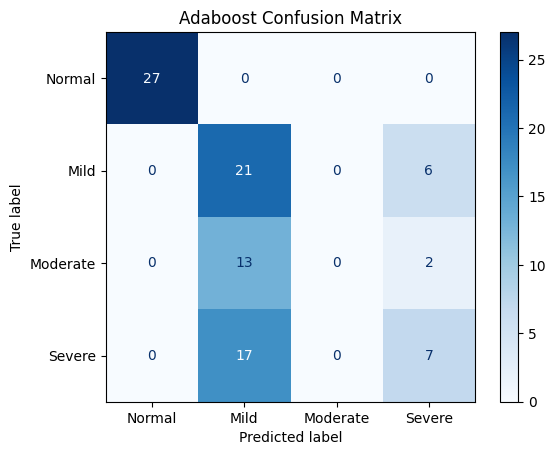

In [60]:
cm = confusion_matrix(y_test, y_labels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=['Normal', 'Mild', 'Moderate', 'Severe'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Adaboost Confusion Matrix')
plt.show()

## Gradient Boosting Classifier

In [61]:
model = GradientBoostingClassifier()
model = model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

(model_test_accuracy , model_test_f1, model_test_precision, model_test_recall, model_test_rocauc_score) = evaluate_model(y_test, y_pred)
print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
roc_auc_score_list.append(model_test_rocauc_score)
    


Model performance for Test set
- Accuracy: 0.5054
- F1 score: 0.5048
- Precision: 0.5109
- Recall: 0.5054
- Roc Auc Score: 0.7520


#### Actual and Predicted Values

In [62]:
y_labels = np.argmax(y_pred, axis=1)

In [63]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_labels})
pred_df

,Actual Value,Predicted Value
225,3,1
30,0,0
39,0,0
222,3,1
124,3,3
...,...,...
22,0,0
358,1,3
46,0,0
168,3,2


In [64]:
pred_df['Actual Value'].value_counts(sort=False)

Actual Value
3    24
0    27
1    27
2    15
Name: count, dtype: int64

In [65]:
pred_df['Predicted Value'].value_counts(sort=False)

Predicted Value
1    20
0    27
3    24
2    22
Name: count, dtype: int64

#### Confusion Matrix

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay

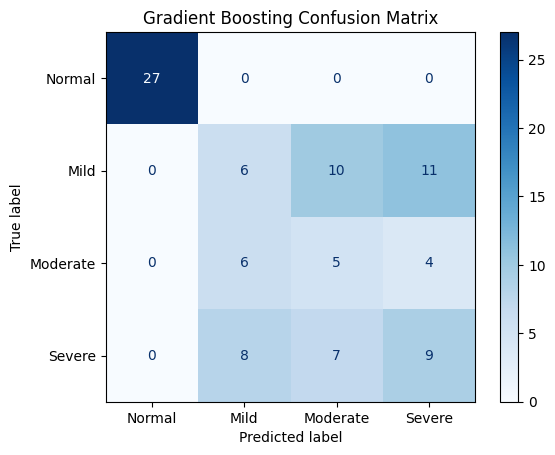

In [67]:
cm = confusion_matrix(y_test, y_labels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=['Normal', 'Mild', 'Moderate', 'Severe'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

## Random Forest Classifier

In [68]:
model = RandomForestClassifier()
model = model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

(model_test_accuracy , model_test_f1, model_test_precision, model_test_recall, model_test_rocauc_score) = evaluate_model(y_test, y_pred)
print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
roc_auc_score_list.append(model_test_rocauc_score)
    


Model performance for Test set
- Accuracy: 0.5161
- F1 score: 0.5104
- Precision: 0.5379
- Recall: 0.5161
- Roc Auc Score: 0.7538


#### Actual and Predicted Values

In [69]:
y_labels = np.argmax(y_pred, axis=1)

In [70]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_labels})
pred_df

,Actual Value,Predicted Value
225,3,3
30,0,0
39,0,0
222,3,1
124,3,3
...,...,...
22,0,0
358,1,2
46,0,0
168,3,2


In [71]:
pred_df['Actual Value'].value_counts(sort=False)

Actual Value
3    24
0    27
1    27
2    15
Name: count, dtype: int64

In [72]:
pred_df['Predicted Value'].value_counts(sort=False)

Predicted Value
3    31
0    27
1    12
2    23
Name: count, dtype: int64

#### Confusion Matrix

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay

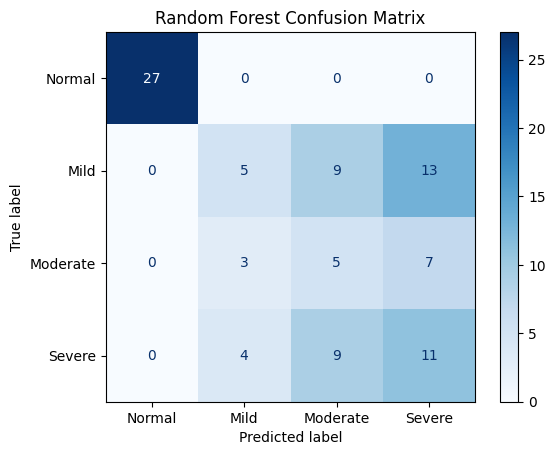

In [74]:
cm = confusion_matrix(y_test, y_labels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=['Normal', 'Mild', 'Moderate', 'Severe'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()

In [75]:
X

,age,gender,device_types_used,average_daily_usage_hours,years_of_digital_device_usage,osdi_total_score,schirmer_test_left_eye,schirmer_test_right_eye,tbut_left_eye,tbut_right_eye,ocular_surface_staining_left_eye,ocular_surface_staining_right_eye
0,23,Male,"Gaming Console, Smartphone, Tablet",8,10,8.000000,14,11,13,10,0,0
1,15,Male,"Gaming Console, Smartphone, Tablet",6,6,2.390000,12,10,13,15,0,0
2,30,Female,"Gaming Console, Smartphone, Tablet",3,6,9.770000,13,10,11,12,0,0
3,23,Male,"Gaming Console, Smartphone, Tablet",7,11,6.460000,14,11,10,13,0,0
4,27,Female,"Smartphone, Computer",8,12,6.900000,14,10,12,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
456,20,Male,"Smartphone, Computer",2,12,91.666667,1,1,3,3,3,1
457,15,Male,"Gaming Console, Smartphone, Tablet",9,4,89.583333,5,0,3,1,1,3
458,21,Male,"Smartphone, Computer",5,8,106.250000,1,5,0,0,3,1
459,22,Male,"Tablet, Smartphone",4,8,83.333333,2,2,2,3,1,2


## save pickle files

In [76]:
df = df_downsampled.copy()

In [77]:
df['device_types_used'].unique()

array(['Gaming Console, Smartphone, Tablet', 'Smartphone, Computer',
       'Tablet, Smartphone'], dtype=object)

In [78]:
df['device_types_used'] = df['device_types_used'].map({'Gaming Console, Smartphone, Tablet' : 0, 'Smartphone, Computer' : 1,
     'Tablet, Smartphone' : 2})

In [79]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

In [80]:
df

,age,gender,device_types_used,average_daily_usage_hours,years_of_digital_device_usage,ded_diagnosis,osdi_total_score,schirmer_test_left_eye,schirmer_test_right_eye,tbut_left_eye,tbut_right_eye,ocular_surface_staining_left_eye,ocular_surface_staining_right_eye,ded_severity,device_smartphone,device_computer,device_tablet,device_gaming_console
0,23,0,0,8,10,No,8.000000,14,11,13,10,0,0,Normal,Yes,No,Yes,Yes
1,15,0,0,6,6,No,2.390000,12,10,13,15,0,0,Normal,Yes,No,Yes,Yes
2,30,1,0,3,6,No,9.770000,13,10,11,12,0,0,Normal,Yes,No,Yes,Yes
3,23,0,0,7,11,No,6.460000,14,11,10,13,0,0,Normal,Yes,No,Yes,Yes
4,27,1,1,8,12,No,6.900000,14,10,12,11,0,0,Normal,Yes,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,20,0,1,2,12,Yes,91.666667,1,1,3,3,3,1,Mild,Yes,Yes,No,No
457,15,0,0,9,4,Yes,89.583333,5,0,3,1,1,3,Mild,Yes,No,Yes,Yes
458,21,0,1,5,8,Yes,106.250000,1,5,0,0,3,1,Mild,Yes,Yes,No,No
459,22,0,2,4,8,Yes,83.333333,2,2,2,3,1,2,Mild,Yes,No,Yes,No


In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
df.drop(columns=['device_smartphone',	'device_computer',	'device_tablet',	'device_gaming_console'], axis=1, inplace=True)

In [83]:
X = df.drop(columns=['ded_severity', 'ded_diagnosis'])
y = df['ded_severity']

In [84]:
X

,age,gender,device_types_used,average_daily_usage_hours,years_of_digital_device_usage,osdi_total_score,schirmer_test_left_eye,schirmer_test_right_eye,tbut_left_eye,tbut_right_eye,ocular_surface_staining_left_eye,ocular_surface_staining_right_eye
0,23,0,0,8,10,8.000000,14,11,13,10,0,0
1,15,0,0,6,6,2.390000,12,10,13,15,0,0
2,30,1,0,3,6,9.770000,13,10,11,12,0,0
3,23,0,0,7,11,6.460000,14,11,10,13,0,0
4,27,1,1,8,12,6.900000,14,10,12,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
456,20,0,1,2,12,91.666667,1,1,3,3,3,1
457,15,0,0,9,4,89.583333,5,0,3,1,1,3
458,21,0,1,5,8,106.250000,1,5,0,0,3,1
459,22,0,2,4,8,83.333333,2,2,2,3,1,2


### random forest pkl

In [85]:
# Step 1: Scaling the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

In [86]:
# Initialize the RandomForest model
model = RandomForestClassifier()

# Train the model with scaled data
model.fit(X_scaled, y)

print("Model training completed!")

Model training completed!


In [ ]:
import joblib

# Save the scaler to a file
joblib.dump(scaler, 'model/randomForest-scaler.pkl')

# Save the trained model to a file
joblib.dump(model, 'model/randomForest-model.pkl')

print("Scaler and Model saved successfully!")


Scaler and Model saved successfully!


### gradient boost pkl

In [88]:
# Step 1: Scaling the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

In [89]:
# Initialize the RandomForest model
model = GradientBoostingClassifier()

# Train the model with scaled data
model.fit(X_scaled, y)

print("Model training completed!")

Model training completed!


In [90]:
model

GradientBoostingClassifier()

In [ ]:
import joblib

# Save the scaler to a file
joblib.dump(scaler, 'model/gradient-scaler.pkl')

# Save the trained model to a file
joblib.dump(model, 'model/gradient-model.pkl')

print("Scaler and Model saved successfully!")


Scaler and Model saved successfully!


In [92]:
df[df['ded_severity'] == 'Severe']

,age,gender,device_types_used,average_daily_usage_hours,years_of_digital_device_usage,ded_diagnosis,osdi_total_score,schirmer_test_left_eye,schirmer_test_right_eye,tbut_left_eye,tbut_right_eye,ocular_surface_staining_left_eye,ocular_surface_staining_right_eye,ded_severity
111,22,1,2,8,1,Yes,83.333333,2,0,2,1,3,1,Severe
112,29,1,2,2,2,Yes,106.250000,3,2,1,1,2,3,Severe
113,19,0,0,8,1,Yes,87.500000,0,1,0,5,2,2,Severe
114,16,0,0,2,6,Yes,83.333333,3,2,1,4,1,2,Severe
115,15,1,2,9,4,Yes,79.166667,2,3,4,1,1,1,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,19,0,1,9,3,Yes,93.750000,5,2,0,3,2,3,Severe
229,15,1,1,8,1,Yes,93.750000,2,0,0,2,2,1,Severe
230,27,0,0,10,2,Yes,100.000000,4,0,0,0,2,3,Severe
231,24,0,2,6,5,Yes,89.583333,2,0,4,2,1,1,Severe


In [93]:
df[df['ded_severity'] == 'Moderate']

,age,gender,device_types_used,average_daily_usage_hours,years_of_digital_device_usage,ded_diagnosis,osdi_total_score,schirmer_test_left_eye,schirmer_test_right_eye,tbut_left_eye,tbut_right_eye,ocular_surface_staining_left_eye,ocular_surface_staining_right_eye,ded_severity
233,17,1,1,5,11,Yes,64.583333,1,5,1,4,3,2,Moderate
234,24,1,1,4,4,Yes,91.666667,1,2,2,5,1,1,Moderate
235,29,1,0,3,11,Yes,83.333333,0,0,2,5,3,2,Moderate
236,22,1,2,7,8,Yes,75.000000,5,5,3,4,3,2,Moderate
237,17,1,1,9,1,Yes,97.916667,0,1,5,3,3,2,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,23,1,2,9,5,Yes,89.583333,1,0,2,3,1,3,Moderate
346,19,1,1,7,5,Yes,91.666667,4,2,1,2,3,3,Moderate
347,18,1,2,5,1,Yes,81.250000,1,4,0,2,2,1,Moderate
348,23,1,2,4,9,Yes,95.833333,3,3,3,0,1,2,Moderate


In [94]:
df[df['ded_severity'] == 'Mild']

,age,gender,device_types_used,average_daily_usage_hours,years_of_digital_device_usage,ded_diagnosis,osdi_total_score,schirmer_test_left_eye,schirmer_test_right_eye,tbut_left_eye,tbut_right_eye,ocular_surface_staining_left_eye,ocular_surface_staining_right_eye,ded_severity
350,16,1,0,7,10,Yes,72.916667,0,5,4,1,1,3,Mild
351,21,0,2,4,1,Yes,87.500000,2,3,3,1,3,3,Mild
352,28,1,0,6,12,Yes,83.333333,3,4,1,5,3,3,Mild
353,13,1,0,3,1,Yes,87.500000,4,5,5,4,2,1,Mild
354,28,1,0,6,3,Yes,72.916667,0,2,2,2,2,2,Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,20,0,1,2,12,Yes,91.666667,1,1,3,3,3,1,Mild
457,15,0,0,9,4,Yes,89.583333,5,0,3,1,1,3,Mild
458,21,0,1,5,8,Yes,106.250000,1,5,0,0,3,1,Mild
459,22,0,2,4,8,Yes,83.333333,2,2,2,3,1,2,Mild


In [95]:
df[df['ded_severity'] == 'Normal']

,age,gender,device_types_used,average_daily_usage_hours,years_of_digital_device_usage,ded_diagnosis,osdi_total_score,schirmer_test_left_eye,schirmer_test_right_eye,tbut_left_eye,tbut_right_eye,ocular_surface_staining_left_eye,ocular_surface_staining_right_eye,ded_severity
0,23,0,0,8,10,No,8.00,14,11,13,10,0,0,Normal
1,15,0,0,6,6,No,2.39,12,10,13,15,0,0,Normal
2,30,1,0,3,6,No,9.77,13,10,11,12,0,0,Normal
3,23,0,0,7,11,No,6.46,14,11,10,13,0,0,Normal
4,27,1,1,8,12,No,6.90,14,10,12,11,0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,30,0,1,4,2,No,10.92,14,13,11,10,0,0,Normal
107,12,1,0,3,5,No,3.42,14,10,14,13,0,0,Normal
108,19,0,0,10,4,No,2.69,15,10,10,13,0,0,Normal
109,15,0,2,9,6,No,1.00,14,14,12,12,0,0,Normal


## Hyperparameter tuning

In [96]:
#Initialize few parameter for Hyperparamter tuning
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

gradient_params = {
    'loss' : ['log_loss', 'exponential'],
    'criterion':['friedman_mse', 'squared_error'],
    'min_samples_split' : [2, 8, 15, 20],
    'n_estimators':[100, 200, 500, 1000],
    'max_features':['sqrt', 'log2'],
    'max_depth':[5, 8, 10, 15, 20, None]
       
}

In [97]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params),
                    ('GradientBoost', GradientBoostingClassifier(), gradient_params)
                   
                   ]

In [98]:
import warnings 
warnings.filterwarnings('ignore')

In [99]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=8, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=8, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=8, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=15, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=5, min_samples_split=8, n_estimators=200; total time=   1.0s
[CV] END max_depth=None, max_features=5, min_samples_split=8, n_estimators=200; total time=   1.0s
[CV] END max_depth=15, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=5, min_samples_split=8, n_estimators=200; total time=   0.8s
[CV] END max_depth=8, max_features=8, min_samples_split=2, n_

In [101]:
models = {

    'Random Forest': RandomForestClassifier(n_estimators=100, min_samples_split=2, max_features=5, max_depth=8),
    'GradientBoosing Classifier': GradientBoostingClassifier(n_estimators=1000, min_samples_split=15, max_features='log2',\
                                                  max_depth=8, loss='log_loss', criterion='squared_error')
}

model_list = []
roc_auc_score_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict_proba(X_train)
    y_test_pred = model.predict_proba(X_test)
    
    # Evaluate Train and Test dataset
    model_train_accuracy , model_train_f1, model_train_precision, model_train_recall, model_train_rocauc_score = evaluate_model(y_train, y_train_pred)

    model_test_accuracy , model_test_f1, model_test_precision, model_test_recall, model_test_rocauc_score = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    print('----------------------------------')
    
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    roc_auc_score_list.append(model_test_rocauc_score)
    
    print('='*35)
    print('\n')


    

Random Forest
Model performance for Training set
- Accuracy: 0.9918
- F1 score: 0.9918
- Precision: 0.9920
- Recall: 0.9918
- Roc Auc Score: 0.9999
----------------------------------
Model performance for Test set
- Accuracy: 0.5054
- F1 score: 0.5002
- Precision: 0.5269
- Recall: 0.5054
- Roc Auc Score: 0.7578


GradientBoosing Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.4946
- F1 score: 0.4961
- Precision: 0.5090
- Recall: 0.4946
- Roc Auc Score: 0.7592


